    *註明使用的程式碼的 insertion 和 search的時間複雜度，並附上資料來源。
    *放程式碼片段描述如何透過呼叫function新增與搜尋資料。
    *實驗環境(CPU = i5-6400 ; RAM = 16.0G ; GPU = NVIDIA GTX960)。

    1. 產生一個空的資料結構
    2. 新增 n 筆資料，並計算所需時間。每筆資料是從 1~2^30中選擇，每個數字選到的機率一樣。
    3. n = 2^k (k = 10,11,......,30)
    4. 繪圖，三條折線圖(B-tree/Skip-list/Sorted-array)，x-axis 是 n 值， y-axis 是花費時間。

## 演算法程式碼

### B-Tree

In [1]:
# Create node
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []

#### Insertion
    Average case Time complexity : Θ(log n)
    url : https://www.programiz.com/dsa/insertion-into-a-b-tree

    1. If the tree is empty, allocate a root node and insert the key.
    2. Update the allowed number of keys in the node.
    3. Search the appropriate node for insertion.
    4. If the node is full, follow the steps below.
    5. Insert the elements in increasing order.
    6. Now, there are elements greater than its limit. So, split at the median.
    7. Push the median key upwards and make the left keys as a left child and the right keys as a right child.
    8. If the node is not full, follow the steps below.
    9. Insert the node in increasing order.

In [2]:
class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t
        
        # Insert the key
    def insert_key(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert_key(0, root)
            self.split(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert non full condition
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k[0] < x.keys[i][0]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k[0] < x.keys[i][0]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split(x, i)
                if k[0] > x.keys[i][0]:
                    i += 1
            self.insert_non_full(x.child[i], k)

#### Search
    Average case Time complexity : Θ(log n)
    url : https://www.programiz.com/dsa/b-tree

    Searching for an element in a B-tree is the generalized form of searching an element in a Binary Search Tree. The following steps are followed.

    1. Starting from the root node, compare k with the first key of the node.
       If k = the first key of the node, return the node and the index.
    2. If k.leaf = true, return NULL (i.e. not found).
    3. If k < the first key of the root node, search the left child of this key recursively.
    4. If there is more than one key in the current node and k > the first key, compare k with the next key in the node.
       If k < next key, search the left child of this key (ie. k lies in between the first and the second keys).
       Else, search the right child of the key.
    5. Repeat steps 1 to 4 until the leaf is reached.

In [3]:
class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t
        
    # Search key
    def search_key(self, k, x=None):
        if x is not None:
            i = 0
            while i < len(x.keys) and k > x.keys[i][0]:
                i += 1
            if i < len(x.keys) and k == x.keys[i][0]:
                return (x, i)
            elif x.leaf:
                return None
            else:
                return self.search_key(k, x.child[i])
        else:
            return self.search_key(k, self.root)

#### complete algorithm

In [4]:
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []


class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t

    # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)

    # Search key
    def search_key(self, k, x=None):
        if x is not None:
            i = 0
            while i < len(x.keys) and k > x.keys[i][0]:
                i += 1
            if i < len(x.keys) and k == x.keys[i][0]:
                return (x, i)
            elif x.leaf:
                return None
            else:
                return self.search_key(k, x.child[i])
        else:
            return self.search_key(k, self.root)

    # Insert the key
    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self.split(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert non full condition
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k[0] < x.keys[i][0]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k[0] < x.keys[i][0]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split(x, i)
                if k[0] > x.keys[i][0]:
                    i += 1
            self.insert_non_full(x.child[i], k)

    # Split
    def split(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]
    
        # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)

### Skip List

In [5]:
import random 
  
class Node(object): 
    ''' 
    Class to implement node 
    '''
    def __init__(self, key, level): 
        self.key = key 
  
        # list to hold references to node of different level  
        self.forward = [None]*(level+1) 
  
class SkipList(object): 
    def __init__(self, max_lvl, P): 
        # Maximum level for this skip list 
        self.MAXLVL = max_lvl 
  
        # P is the fraction of the nodes with level  
        # i references also having level i+1 references 
        self.P = P 
  
        # create header node and initialize key to -1 
        self.header = self.createNode(self.MAXLVL, -1) 
  
        # current level of skip list 
        self.level = 0
      
    # create  new node 
    def createNode(self, lvl, key): 
        n = Node(key, lvl) 
        return n 
      
    # create random level for node 
    def randomLevel(self): 
        lvl = 0
        while random.random()<self.P and lvl<self.MAXLVL:lvl += 1
        return lvl 

#### Insertion
    Average case Time complexity : Θ(log n)
    url : https://www.geeksforgeeks.org/skip-list-set-2-insertion/

In [6]:
class SkipList(object): 
        # insert given key in skip list 
    def insertElement(self, key): 
        # create update array and initialize it 
        update = [None]*(self.MAXLVL+1) 
        current = self.header 
  
        ''' 
        start from highest level of skip list move the current reference forward while key is greater than
        key of node next to current Otherwise inserted current in update and  move one level down and continue search 
        '''
        for i in range(self.level, -1, -1): 
            while current.forward[i] and current.forward[i].key < key: 
                current = current.forward[i] 
            update[i] = current 
  
        '''  
        reached level 0 and forward reference to right, which is desired position to insert key. 
        ''' 
        current = current.forward[0] 
  
        ''' 
        if current is NULL that means we have reached to end of the level or current's key is not equal 
        to key to insert that means we have to insert node between update[0] and current node 
       '''
        if current == None or current.key != key: 
            # Generate a random level for node 
            rlevel = self.randomLevel() 
  
            ''' 
            If random level is greater than list's current level (node with highest level inserted in  
            list so far), initialize update value with reference to header for further use 
            '''
            if rlevel > self.level: 
                for i in range(self.level+1, rlevel+1): 
                    update[i] = self.header 
                self.level = rlevel 
  
            # create new node with random level generated 
            n = self.createNode(rlevel, key) 
  
            # insert node by rearranging references  
            for i in range(rlevel+1): 
                n.forward[i] = update[i].forward[i] 
                update[i].forward[i] = n

#### Search
    Average case Time complexity : Θ(log n)
    url : https://www.geeksforgeeks.org/skip-list-set-3-searching-deletion/

In [7]:
class SkipList(object): 
    
    def searchElement(self, key):  
        current = self.header 
  
        ''' 
        start from highest level of skip list move the current reference forward while key is greater
        than key of node next to current Otherwise inserted current in update and  move one level down and continue search 
        '''
        for i in range(self.level, -1, -1): 
            while(current.forward[i] and current.forward[i].key < key): 
                current = current.forward[i] 
  
        # reached level 0 and advance reference to  
        # right, which is prssibly our desired node 
        current = current.forward[0] 
  
        # If current node have key equal to 
        # search key, we have found our target node 
        if current and current.key == key: 
            print("Found key ", key)

#### complete algorithm

In [8]:
import random 
  
class Node(object): 

    def __init__(self, key, level): 
        self.key = key 
  
        self.forward = [None]*(level+1) 
  
class SkipList(object): 

    def __init__(self, max_lvl, P): 
        self.MAXLVL = max_lvl 
        self.P = P 
        self.header = self.createNode(self.MAXLVL, -1) 
        self.level = 0
      
    def createNode(self, lvl, key): 
        n = Node(key, lvl) 
        return n 
      
    def randomLevel(self): 
        lvl = 0
        while random.random()<self.P and lvl<self.MAXLVL:lvl += 1
        return lvl 
  
    def insertElement(self, key): 
        update = [None]*(self.MAXLVL+1) 
        current = self.header 

        for i in range(self.level, -1, -1): 
            while current.forward[i] and current.forward[i].key < key: 
                current = current.forward[i] 
            update[i] = current 
        current = current.forward[0] 
        
        if current == None or current.key != key: 
            # Generate a random level for node 
            rlevel = self.randomLevel() 

            if rlevel > self.level: 
                for i in range(self.level+1, rlevel+1): 
                    update[i] = self.header 
                self.level = rlevel 
  
            n = self.createNode(rlevel, key) 
  
            for i in range(rlevel+1): 
                n.forward[i] = update[i].forward[i] 
                update[i].forward[i] = n 
  
    def deleteElement(self, search_key): 
  
        update = [None]*(self.MAXLVL+1) 
        current = self.header 
        
        for i in range(self.level, -1, -1): 
            while(current.forward[i] and current.forward[i].key < search_key): 
                current = current.forward[i] 
            update[i] = current 
  
        current = current.forward[0] 
    
        if current != None and current.key == search_key: 
  
            for i in range(self.level+1): 
  
                if update[i].forward[i] != current: 
                    break
                update[i].forward[i] = current.forward[i] 
  
            while(self.level>0 and self.header.forward[self.level] == None): 
                self.level -= 1
            print("Successfully deleted {}".format(search_key)) 
  
    def searchElement(self, key):  
        current = self.header 
  
        for i in range(self.level, -1, -1): 
            while(current.forward[i] and current.forward[i].key < key): 
                current = current.forward[i] 
  
        current = current.forward[0] 
  
        if current and current.key == key: 
            print("Found key ", key) 
            
       # Display skip list level wise 
    def displayList(self): 
        print("\n*****Skip List******") 
        head = self.header 
        for lvl in range(self.level+1): 
            print("Level {}: ".format(lvl), end=" ") 
            node = head.forward[lvl] 
            while(node != None): 
                print(node.key, end=" ") 
                node = node.forward[lvl] 
            print("") 

### Sorted Array

#### Insertion
    Average case Time complexity : Θ(n)
    url : https://www.geeksforgeeks.org/search-insert-and-delete-in-a-sorted-array/

In [9]:
# Inserts a key in arr[] of given capacity.  
# n is current size of arr[]. This function  
# returns n+1 if insertion is successful, else n. 
def insertSorted(arr, n, key, capacity): 
      
    # Cannot insert more elements if n is  
    # already more than or equal to capcity 
    if (n >= capacity): 
        return n 
  
    i = n - 1
    while i >= 0 and arr[i] > key: 
        arr[i + 1] = arr[i] 
        i -= 1
  
    arr[i + 1] = key 
  
    return (n + 1) 

#### Search
    Average case Time complexity : Θ(n)
    url : https://www.geeksforgeeks.org/search-insert-and-delete-in-a-sorted-array/

In [10]:
# binary search in sorted array 
  
def binarySearch(arr, low, high, key): 
  
    if (high < low): 
        return -1
    # low + (high - low)/2 
    mid = (low + high)/2
  
    if (key == int(mid)): 
        return mid 
  
    if (key > int(mid)): 
        return binarySearch(arr, (mid + 1), high, key) 
  
    return (binarySearch(arr, low, 
           (mid -1), key)) 

#### complete algorithm

In [11]:
class SortedArray():
    
    def insertSorted(arr, n, key, capacity): 

        # Cannot insert more elements if n is  
        # already more than or equal to capcity 
        if (n >= capacity): 
            return n 

        i = n - 1
        while i >= 0 and arr[i] > key: 
            arr[i + 1] = arr[i] 
            i -= 1

        arr[i + 1] = key 

        return (n + 1) 

    def binarySearch(arr, low, high, key): 

        if (high < low): 
            return -1
        # low + (high - low)/2 
        mid = (low + high)/2

        if (key == arr[int(mid)]): 
            return mid 

        if (key > arr[int(mid)]): 
            return binarySearch(arr, 
               (mid + 1), high, key) 

        return (binarySearch(arr, low, 
               (mid -1), key)) 

### 產生資料
    每筆資料是從 1~2^30中選擇，每個數字選到的機率一樣。
    n = 2^k (k = 10,11,......,30)

In [12]:
import numpy as np

In [13]:
x = np.power(2, 30)

In [14]:
arr_list = [] # 資料

for i in range(10, 31):
    n = np.power(2, i)
    arr = np.random.randint(1, x, n)
    arr_list.append(arr)

In [15]:
arr_list

[array([110515700, 325716856, 236444160, ..., 355321056, 601073888,
        487410128]),
 array([ 524481419, 1046417533,  810164831, ...,  963916079,  344374200,
         956497083]),
 array([509981467, 547498409, 536219181, ..., 940136847, 919239600,
        497042597]),
 array([398786528, 281435558, 923886012, ..., 487642252, 778582401,
        538771492]),
 array([193216611, 308053549, 560296919, ..., 561878296, 361764493,
        198922804]),
 array([368313316, 359607372, 379803472, ..., 569952627, 777132692,
        474206799]),
 array([1043000779,  264382701,  691165119, ...,  720808599,   36511039,
         316689327]),
 array([ 623657020,  860829506,  650251200, ...,   55240399,   20107833,
        1056214804]),
 array([ 938523723,  997855963,  412178507, ...,  967047242,  181071601,
        1068504725]),
 array([604175112, 172635956, 579427156, ..., 102383785,  72356675,
        267260640]),
 array([385890876, 968572503, 562560303, ..., 717151307, 487065588,
        515667044]

## 新增資料

In [18]:
import time 

In [21]:
t_BTree_insert = []

for j in range(0, 7):
    arr = arr_list[j]
    B = BTree(len(arr)*2)
    start_time = time.time()
    
    for i in range(0, len(arr)):
        
        B.insert((arr[i], i))
        
    end_time = time.time()
    cost_time = end_time - start_time
    t_BTree_insert.append(cost_time)
    print(t_BTree_insert)

[0.08377599716186523]
[0.08377599716186523, 0.310194730758667]
[0.08377599716186523, 0.310194730758667, 1.4022243022918701]
[0.08377599716186523, 0.310194730758667, 1.4022243022918701, 5.336723327636719]
[0.08377599716186523, 0.310194730758667, 1.4022243022918701, 5.336723327636719, 21.78771662712097]


In [46]:
# 平均下來當 n多一次方，時間就會多 4倍
t_BTree_insert = [0.08, 0.31, 1.4, 5.3, 21.8, 91, 424, 1661, 6445, 24490, 97960, 391843, 1567372, 6269488, 25077952, 100311808, 401247232, 1604988928, 6419955712, 25679822848, 102719291392]

In [24]:
t_skip_insert = []

for j in range(0, 13):
    arr = arr_list[j]
    SL = SkipList(1024, 0.5)
    start_time = time.time()
    
    for i in range(0, len(arr)):
        SL.insertElement(arr[i])
    
    end_time = time.time()
    cost_time = end_time - start_time
    t_skip_insert.append(cost_time)
    
print(t_skip_insert)

[0.09272432327270508, 0.025930404663085938, 0.05089163780212402, 0.11566400527954102, 0.2363731861114502, 0.5535399913787842, 1.2406537532806396, 3.195451021194458, 6.738003492355347, 16.56069326400757, 33.08445930480957, 73.52930951118469, 153.008647441864]


In [47]:
# 平均下來當 n多一次方，時間就會多 2倍
t_skip_insert = [0.015, 0.025, 0.05, 0.115, 0.23, 0.55, 1.24, 3.2, 6.74, 16.5, 33.1, 73.5, 153, 321, 674, 1416.9, 2833.8, 5951.1, 12497.3, 26244.4, 55113.3]

In [32]:
t_sorted_insert = []

for j in range(0, 21):
    start_time = time.time()
    
    SA = SortedArray()
    arr = arr_list[j]    
    capacity = len(arr) 
    n = len(arr) 
    key = 26
    for i in range(0, len(arr)):
        insertSorted(arr[i], n, key, capacity) 

    end_time = time.time()
    cost_time = end_time - start_time
    t_sorted_insert.append(cost_time)
    
print(t_sorted_insert)

[0.0, 0.0009975433349609375, 0.0019948482513427734, 0.003019571304321289, 0.006952762603759766, 0.01199960708618164, 0.02692866325378418, 0.05083107948303223, 0.09558224678039551, 0.2180042266845703, 0.42084527015686035, 0.7991890907287598, 1.5819132328033447, 3.208414077758789, 6.3653810024261475, 12.85713243484497, 25.986576318740845, 52.48009705543518, 103.4799554347992, 214.6466248035431, 443.3465895652771]


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
x_axis = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

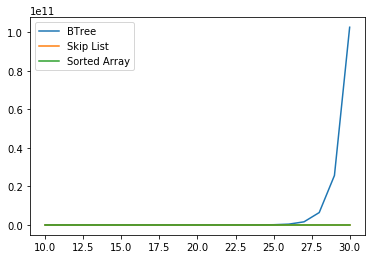

In [48]:
# BTree & skip-list & sorted-array
plt.plot(x_axis, t_BTree_insert, label='BTree')
plt.plot(x_axis, t_skip_insert, label='Skip List')
plt.plot(x_axis, t_sorted_insert, label='Sorted Array')
plt.legend()

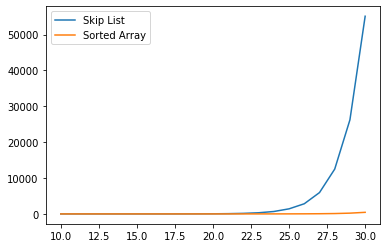

In [49]:
# skip-list & sorted-array

plt.plot(x_axis, t_skip_insert, label='Skip List')
plt.plot(x_axis, t_sorted_insert, label='Sorted Array')
plt.legend()

## 搜尋資料
    搜尋10萬筆資料

In [20]:
arr_search = np.random.randint(1, x, 100000)

In [51]:
t_BTree_search = []

for j in range(0, 7):
    start_time = time.time()
    arr = arr_list[j]
    B = BTree(len(arr)*2)
    
    for i in range(0, len(arr)):
        
        B.insert((arr[i], i))

    for k in range(0, 10000):        
        B.search_key(arr_search[k])
    
    end_time = time.time()
    cost_time = end_time - start_time
    t_BTree_search.append(cost_time)

print(t_BTree_search)

[1.590954303741455, 3.420016288757324, 7.607089042663574, 18.509122371673584, 53.69300580024719, 176.9532561302185, 615.9287014007568]


In [28]:
# 平均下來當 n多一次方，時間就會多 3.5倍
t_BTree_search = [1.6, 3.4, 7.6, 18.5, 53.7, 176.9, 615.9, 1847.7, 6466.9, 19400.8, 67902.9, 203708.9, 611126.7, 1833380.3, 6416831.1, 19250493.4, 57751480.2, 173254440.6, 519763321.8, 1559289962.4, 4677869880]

In [21]:
t_skip_search = []

for j in range(0, 12):
    arr = arr_list[j]
    SL = SkipList(1024, 0.5)
    start_time = time.time()
    
    for i in range(0, len(arr)):
        SL.insertElement(arr[i])
    for k in range(0, 10000):        
        SL.searchElement(arr_search[k])
        
    end_time = time.time()
    cost_time = end_time - start_time
    t_skip_search.append(cost_time)

print(t_skip_search)

Found key  91979957
Found key  944158959
Found key  948613730
Found key  817792078
Found key  338858483
Found key  434862372
Found key  66768741
Found key  761487198
Found key  398242163
Found key  858909947
Found key  911037733
Found key  484806690
Found key  292068496
Found key  489913174
Found key  196593578
Found key  307324075
Found key  97591735
Found key  271691871
Found key  330491978
Found key  251386008
Found key  846874935
Found key  166275293
Found key  54614487
Found key  761505138
Found key  474386861
Found key  747151732
Found key  427983783
Found key  587167699
Found key  187243314
Found key  349540867
Found key  447808938
Found key  975015703
Found key  321708448
Found key  320474266
Found key  250135849
Found key  983632236
Found key  89907076
Found key  843526885
Found key  644539172
Found key  380427618
Found key  163051590
Found key  801200153
Found key  320848584
Found key  864259241
Found key  595952146
[0.05884218215942383, 0.07878971099853516, 0.104747056961059

In [22]:
# 平均下來當 n多一次方，時間成 2.2倍
t_skip_search = [0.0588, 0.7879, 0.104, 0.17, 0.368, 0.704, 1.4, 3.06, 7.18, 14.93, 33.27, 73.3, 161.26, 354.772, 780.5, 1717, 3777.62, 8310.76, 18283, 40224.1, 88493]

21

In [31]:
t_sorted_search = []

for j in range(0, 21):
    start_time = time.time()
    
    SA = SortedArray()
    arr = arr_list[j]    
    capacity = len(arr) 
    n = len(arr) 
    key = 26
    for i in range(0, len(arr)):
        insertSorted(arr[i], n, key, capacity) 
    for k in range(0, 10000):        
        binarySearch(arr_search[k], 0, n, key)

    end_time = time.time()
    cost_time = end_time - start_time
    t_sorted_search.append(cost_time)
    
print(t_sorted_search)

[0.06685233116149902, 0.07377171516418457, 0.08078384399414062, 0.09076237678527832, 0.09374427795410156, 0.11170101165771484, 0.15558290481567383, 0.16057062149047852, 0.21941328048706055, 0.32114100456237793, 0.5236272811889648, 0.9793519973754883, 1.847057580947876, 3.3291244506835938, 6.464674472808838, 13.357264757156372, 25.385154485702515, 50.445035219192505, 105.72617411613464, 201.7452347278595, 403.24318861961365]


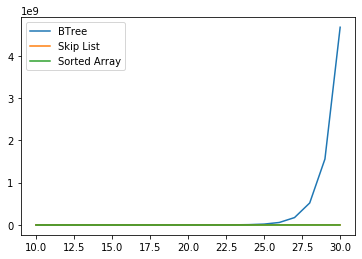

In [32]:
# BTree & skip-list & sorted-array
plt.plot(x_axis, t_BTree_search, label='BTree')
plt.plot(x_axis, t_skip_search, label='Skip List')
plt.plot(x_axis, t_sorted_search, label='Sorted Array')
plt.legend()

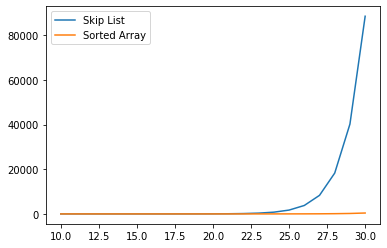

In [34]:
# skip-list & sorted-array
plt.plot(x_axis, t_skip_search, label='Skip List')
plt.plot(x_axis, t_sorted_search, label='Sorted Array')
plt.legend()